In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [83]:
data = pd.read_csv('Potentiometric_titration.csv')

In [84]:
data.head()

,Volume Added/ml,pH
0,0.00,3.27
1,1.50,3.71
2,4.00,4.21
3,6.00,4.47
4,7.05,4.57


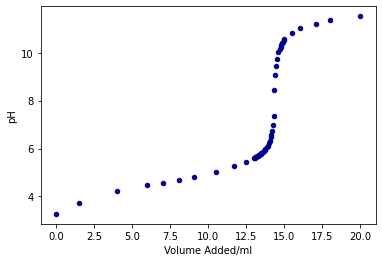

In [85]:
ax1 = data.plot.scatter(x='Volume Added/ml',
                      y='pH',
                      c='DarkBlue')

In [86]:
xdata = data['Volume Added/ml']
ydata = data['pH']

In [87]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

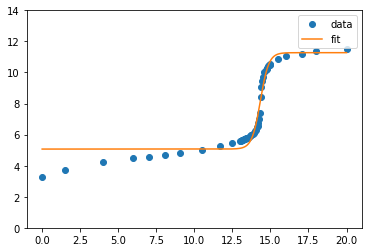

In [88]:
x = np.linspace(0, 20, 1000)
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.ylim(0, 14)
plt.legend(loc='best')

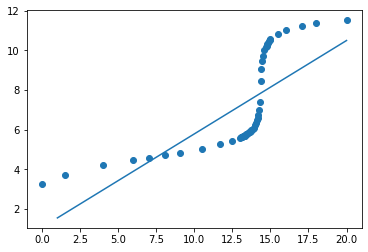

In [89]:
model = np.poly1d(np.polyfit(xdata, ydata, 1))
line = np.linspace(1,20,100)
plt.scatter(xdata, ydata)
plt.plot(line, model(line))
plt.show()

In [90]:
data

,Volume Added/ml,pH
0,0.00,3.27
1,1.50,3.71
2,4.00,4.21
3,6.00,4.47
4,7.05,4.57
5,8.10,4.70
6,9.05,4.82
7,10.50,5.03
8,11.70,5.25
9,12.50,5.44


In [91]:
lowerx = xdata[2:11]
lowery = ydata[2:11]

midx = xdata[27:42]
midy = ydata[27:42]

topx = xdata[46:]
topy = ydata[46:]

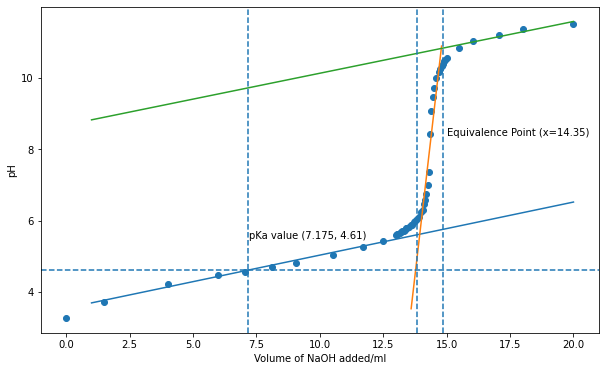

In [92]:
modellower = np.poly1d(np.polyfit(lowerx, lowery, 1))
modelmid = np.poly1d(np.polyfit(midx, midy, 1))
modeltop = np.poly1d(np.polyfit(topx, topy, 1))
line = np.linspace(1,20,100)
linemid = np.linspace(13.6,14.8,100)
plt.figure(figsize=(10,6))
plt.scatter(xdata, ydata)
plt.xlabel("Volume of NaOH added/ml")
plt.ylabel("pH")

plt.plot(line, modellower(line))
plt.plot(linemid, modelmid(linemid))
plt.plot(line, modeltop(line))
plt.axvline(x=13.85, ls="--")
plt.axvline(x=14.85, ls="--")
plt.axvline(x=7.175, ls="--")
plt.axhline(y=4.61, ls="--")
plt.text(15,8.4,'Equivalence Point (x=14.35)')
plt.text(7.2,5.5,'pKa value (7.175, 4.61)')

fig = plt.gcf()

plt.show()
fig.savefig('potentiometric.png', dpi=100)

In [93]:
modellower

poly1d([0.14874533, 3.54419526])

In [94]:
modeltop

poly1d([0.14512378, 8.67845606])

In [95]:
14.35

14.35

In [81]:
modellower[1] * (14.35/2) + modellower[0]

4.61144301396988